# Conditional Maximin Order

Figure 2 from the paper, illustrating the conditional maximin order idea.

In [ ]:
import matplotlib.pyplot as plt

# Set global font size and style
plt.rc('font', size=10)  
plt.rc('axes', titlesize=12)  
plt.rc('axes', labelsize=10)  
plt.rc('xtick', labelsize=8)  
plt.rc('ytick', labelsize=8)  
plt.rc('legend', fontsize=9)  
plt.rc('figure', titlesize=12) 
plt.rc('font', family='serif')  

In [ ]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

# Packages for data loading
import pathlib
import pickle

# Packages for working with array data and tensors]
import numpy as np
import torch

c:\Users\Aleja\anaconda3\envs\batram-mf\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Data Loading

There are three grids of locations in the `data_mf.pkl` file. I will use only the last two for illustration purposes. 

In [7]:
# Load data and print dimensions. I have some handy grids
# here for illustration purposes.
data_fp = pathlib.Path("../tests/data/data_mf.pkl")
with open(data_fp, "rb") as fh:
    data_pkl: dict[str, np.ndarray] = pickle.load(fh)

# veccs really doesn't like when points at different grids
# are in the same location
locs_mf = data_pkl["locs_mf"] + 1e-5 * np.random.randn(*data_pkl["locs_mf"].shape)
locs_hf = data_pkl["locs_hf"] 

C:\Users\Aleja\AppData\Local\Temp\ipykernel_17056\3698384409.py:9: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  locs_mf = data_pkl["locs_mf"] + 1e-5 * np.random.randn(*data_pkl["locs_mf"].shape)


In [8]:
from veccs.orderings import maxmin_pred_cpp, find_nns_l2_mf

locs = torch.vstack((locs_mf, locs_hf))
ord = maxmin_pred_cpp(locs_mf.detach().numpy(), locs_hf.detach().numpy())

ord_mf = ord[:100]
ord_hf = ord[100:]

#ord = np.loadtxt('./ord.csv', dtype=int)    
locs_ord = locs[ord, ...]

# Finding nearest neighbors using the `veccs` package.
# For this example let's use 20 max nearest neighbors. 
# For the multifidelity version, pass a list of the ordered locs from
# lowest to highest fidelity
locs_all = [locs_ord[:100].detach().numpy(), locs_ord[100:].detach().numpy()]
locs_mf_ord = locs_ord[:100]
locs_hf_ord = locs_ord[100:]
largest_conditioning_set = 4
nn = find_nns_l2_mf(locs_all, largest_conditioning_set)

locs_ord = locs[ord, ...]

Text(0.7174297188755018, 0.20119021540708282, '(b) $i=185$')

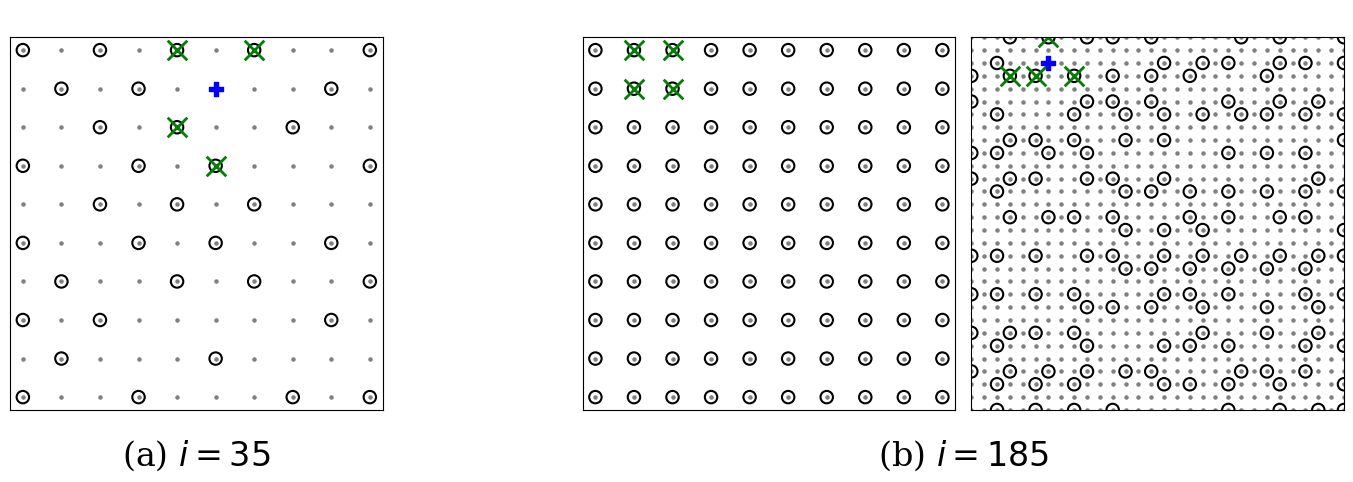

In [ ]:
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt

# ----------------- Global style -----------------
plt.rc('font', size=12*2)
plt.rc('axes', titlesize=12*2)
plt.rc('axes', labelsize=12*2)
plt.rc('xtick', labelsize=8*2)
plt.rc('ytick', labelsize=8*2)
plt.rc('legend', fontsize=9*2)
plt.rc('figure', titlesize=12*2)
plt.rc('font', family='serif')  # e.g., Times

# ----------------- Figure & gridspec -----------------
f = plt.figure(figsize=(14.5, 5.5))

# Wider spacer between (a) and (b)
SPACER = 0.45
outer = GridSpec(
    1, 4, figure=f,
    width_ratios=[1, SPACER, 1, 1],  # col 1 is the invisible spacer
    wspace=0.05
)

# arbitrary choice of index for illustration, can be changed
# picking too low or too high will make the plots less clear, 
# pick one in the first grid (0 to 99), one in the second grid
# (100 to 999) 
# for this example to work
i = 35
locs_nn_mf = locs_mf_ord[nn[i, 0:4]]
loc_cross = locs_mf_ord[i]
locs_preb = locs_mf_ord[0:i]

# i.e., index 185 in combined ordering
j = 150
locs_nn_hf_mf = locs_mf_ord[nn[100+j, 4:]]
locs_nn_hf = locs_hf_ord[nn[100+j][0:4]-100]
locs_preb_hf = locs_hf_ord[:j]
loc_cross_hf = locs_hf_ord[j]

# Give extra room at bottom for captions (shared vertical position)
f.subplots_adjust(left=0.06, right=0.98, bottom=0.20, top=0.98)

# (a)
ax_a = f.add_subplot(outer[0, 0])
ax_a.scatter(locs_mf[:,0],  locs_mf[:,1],  color='grey', s=5)
ax_a.scatter(locs_preb[:,0], locs_preb[:,1], facecolors='none', edgecolors='k', s=80, linewidths=1.5)
ax_a.scatter(loc_cross[0],  loc_cross[1],  color='blue', marker='P', s=100, linewidths=1)
ax_a.scatter(locs_nn_mf[:,0], locs_nn_mf[:,1], color='green', marker='x', s=200, linewidths=2)
ax_a.set_xlim(0, 1); ax_a.set_ylim(0, 1)
ax_a.set_aspect('equal', adjustable='box')
ax_a.set_xticks([]); ax_a.set_yticks([])

# Spaces
f.add_subplot(outer[0, 1]).axis("off")

# (b) left
ax_b_left = f.add_subplot(outer[0, 2])
ax_b_left.scatter(locs_mf[:,0],  locs_mf[:,1],  color='grey', s=5)  # grey background dots
ax_b_left.scatter(locs_mf[:,0],  locs_mf[:,1],  facecolors='none', edgecolors='k', s=80, linewidths=1.5)
ax_b_left.scatter(locs_nn_hf_mf[:,0], locs_nn_hf_mf[:,1], color='green', marker='x', s=200, linewidths=2)
ax_b_left.set_xlim(0, 1); ax_b_left.set_ylim(0, 1)
ax_b_left.set_aspect('equal', adjustable='box')
ax_b_left.set_xticks([]); ax_b_left.set_yticks([])

# (b) right
ax_b_right = f.add_subplot(outer[0, 3])
ax_b_right.scatter(locs_hf[:,0],  locs_hf[:,1],  color='grey', s=5)
ax_b_right.scatter(locs_preb_hf[:,0], locs_preb_hf[:,1], facecolors='none', edgecolors='k', s=80, linewidths=1.5)
ax_b_right.scatter(locs_nn_hf[:,0], locs_nn_hf[:,1], color='green', marker='x', s=200, linewidths=2)
ax_b_right.scatter(loc_cross_hf[0],  loc_cross_hf[1],  color='blue', marker='P', s=100, linewidths=1)
ax_b_right.set_xlim(0, 1); ax_b_right.set_ylim(0, 1)
ax_b_right.set_aspect('equal', adjustable='box')
ax_b_right.set_xticks([]); ax_b_right.set_yticks([])

# captions at same height. Have to do some work to get this right.
bbox_a  = ax_a.get_position()
bbox_bl = ax_b_left.get_position()
bbox_br = ax_b_right.get_position()

# Common caption y (slightly below the lowest axes bottom)
y_caption = min(bbox_a.y0, bbox_bl.y0, bbox_br.y0) - 0.05
y_caption = max(0.02, y_caption) 

# Centers for (a) and for (b)
x_center_a = 0.5 * (bbox_a.x0 + bbox_a.x1)
x_center_b = 0.5 * (bbox_bl.x0 + bbox_br.x1)

f.text(x_center_a, y_caption, r"(a) $i=35$",  ha='center', va='top')
f.text(x_center_b, y_caption, r"(b) $i=185$", ha='center', va='top')

# ----------------- Save -----------------
#OUTPUT_FILE = "maxmin_order.pdf"
#DPI = 300
#f.savefig(OUTPUT_FILE, format='pdf', dpi=DPI, bbox_inches='tight')